## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
len(df[df['converted'] == 1]) / len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df.group.unique(), df.landing_page.unique()

(array(['control', 'treatment'], dtype=object),
 array(['old_page', 'new_page'], dtype=object))

In [9]:
len(df.query('group == "treatment" and landing_page != "new_page"')) + \
len(df.query('group != "treatment" and landing_page == "new_page"'))

3893

f. Do any of the rows have missing values?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
temp1 = df.query('group == "treatment" and landing_page == "new_page"')
temp2 = df.query('group == "control" and landing_page == "old_page"')
df2 = pd.concat([temp1, temp2])

In [13]:
len(df) - len(df2)

3893

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
temp = df2[df2.groupby(['user_id'])['timestamp'].transform('nunique') > 1]
temp

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop([1899], inplace = True)

In [19]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
len(df2[df2.converted == 1]) / len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
len(df2.query('group == "control" and converted == 1')) / len(df2.query('group == "control"'))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
len(df2.query('group == "treatment" and converted == 1')) / len(df2.query('group == "treatment"'))

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
len(df2.query('landing_page == "new_page"')) / len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

There isn't sufficient evidence to conclude that the new treatment page leads to more conversions. In fact the conversion rate for treatment group at 11.88 percent is slightly lower than for control group at 12.04 percent. Also the number of users in both control and treatment groups are almost equal.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0: p_{new} - p_{old} <= 0$$
$$ H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
#Under null both old and new coversion rates should equal
#that is they should reach the average coversion rate of the whole data
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = len(df2.query('group == "treatment"'))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = len(df2.query('group == "control"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
# Simulate conversion rates under null hypothesis
new_page_converted = np.random.choice([0, 1], n_new, p = [(1 - p_new), p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
# Simulate conversion rates under null hypothesis
old_page_converted = np.random.choice([0, 1], n_old, p = [(1 - p_old), p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
# Calculate difference in p under the null hypothesis
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.0024342840456090808

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []

# Re-run simulation 10,000 times
for i in range(10000):
    p_new1 = np.random.choice([0, 1], n_new, p = [(1 - p_new), p_new])
    p_old1 = np.random.choice([0, 1], n_old, p = [(1 - p_old), p_old])
    p_diffs.append(p_new1.mean() - p_old1.mean())

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

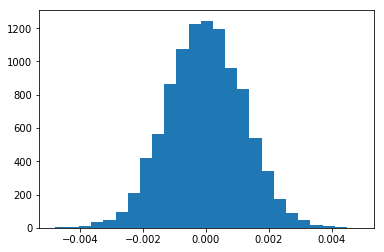

In [65]:
# Plot histogram
plt.hist(p_diffs, bins= 25);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
actual_diff = df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean()
actual_diff

-0.0014795997940775518

In [34]:
(p_diffs > actual_diff).mean()

0.88429999999999997

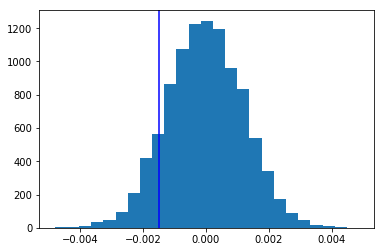

In [66]:
plt.hist(p_diffs, bins = 25);
plt.axvline(x = actual_diff, color = 'blue');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We have calculated the p-value, that is the probability of observing our statistic (actual_diff) or something more extreme in favor of the alternative hypothesis, given the null is true.

$$ p = 0.8897 $$

Since the p-value is very larger than the type-I error threshold of 0.05, we fail to reject the null hypothesis, where we assumed that coversion rate for the new page is either equal to or less than the rate for old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = sum(df2.query('landing_page == "old_page"')['converted'])
convert_new = sum(df2.query('landing_page == "new_page"')['converted'])
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_stat, p_val = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
z_stat, p_val

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [38]:
from scipy.stats import norm

#Critical value for 95% confidence interval
norm.ppf(1 - 0.05)

1.6448536269514722

The values of z-score and p-value calculated above are less then the critical value of 1.64 and larger than the type-I error threshold of 0.05 respectively, hence, as in the previous result (part j), we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

It is a classification problem, hence logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
#Instantiating the model
logit = sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])

#Calculating results
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        16:39:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value of 0.19 is larger than the value found in part II because z-test is a two tailed test. Even here we don't have enough evidence to reject the null.

Null and alternative hypothesis associated with this regression model.

$$ H_0: p_{new} - p_{old} = 0$$
$$ H_1: p_{new} - p_{old} != 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

As we have seen earlier, if the tests were performed on existing users then it can sometimes lead to two kinds of biases, change aversion and novelty effect. Anyway we can't conclusively say if either of them played a role here as we don't know which users were new and which ones were old. Had that additional information along with other data like duration of the view, kind of device which the user was using, was the application mobile or web application, etc. been provided, we could have possibly made an even deeper analysis.

However, the disadvantage of adding additional terms may be we don't know for sure if some variables are really affecting the conversion rate, their impact could be very minimal or nothing.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
df_countries = pd.read_csv('countries.csv')

In [43]:
df_countries.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [44]:
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [52]:
df3 = df2.merge(df_countries, on = 'user_id')
df4 = pd.get_dummies(df3, columns = ['country'])
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country_CA,country_UK,country_US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1,0,0


In [60]:
logit_countries = sm.Logit(df4['converted'], df4[['intercept', 'country_US', 'country_UK']])
results = logit_countries.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        17:57:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

Even now, after taking into account users' countries, we are seeing p-values (0.129 and 0.074 for US and UK resp.) higher than alpha. Hence, we don't have enough evidence to reject null.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [62]:
logit_page_ctry = sm.Logit(df4.converted, df4[['intercept', 'ab_page', 'country_US', 'country_UK']])
results = logit_page_ctry.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 10 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        18:05:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

Still p-values for factors ab_page, UK and US are not small enough (< 0.05) to be concluded statistically significant.

<a id='conclusions'></a>
### Conclusion

In both A/B test (part II) and regression models (part III) we saw p-values larger than 0.05 (alpha), hence there wasn't sufficient evidence to reject our null hypothesis that coversion rate for new page users was either equal to or less than the conversion rate for old page users.

Even after taking users' countries into account we couldn't find any statistically significant results to conclusively say these factors have a bearing on conversion rate.

Had we been given other information like user's device, kind of application like web or mobile, duration of view, etc. we could possibly have found a statistically significant a factor that affects the coversion rate.